In [222]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score , classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [223]:
root = "/content/DataSet_1.csv"

In [224]:
#Reading th CSV file
df = pd.read_csv(root)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [226]:
#We define a function to convert the objects into integers
def str_to_int(data):
  for col in data.columns:
    for i,item in enumerate(data[col]):
      if isinstance(item,str):
        try:
          data.at[i,col] = int(item)
          data.at[i,col] = float(item)
        except ValueError:
          if data[col].dtype == "object":
            labels, _= pd.factorize(data[col])
            data[col] = labels

  return data

In [227]:
str_to_int(df)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,1,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,2,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,3,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,4,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,2
996,996,996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
997,997,997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
998,998,998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


In [228]:
#The last column (target) is the output
X_1 = df.drop(["index","Patient Id","Level"],axis=1)
y_1 = df["Level"]

In [229]:
X_1

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [230]:
#Split test and train
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size = 0.20, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 23), (200, 23), (800,), (200,))

### Random Forest method

In [231]:
random_forest_clf = RandomForestClassifier(criterion='gini',n_estimators=20, max_depth=3, random_state=42)
random_forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=42)

In [232]:
y_pred = random_forest_clf.predict(X_test)

In [233]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       1.00      1.00      1.00        63
           2       0.98      1.00      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [234]:
accuracy_random_forest = accuracy_score(y_test,y_pred)

In [235]:
print(f"The accuracy for random forest is {accuracy_random_forest}")

The accuracy for random forest is 0.99


In [236]:
importances = random_forest_clf.feature_importances_
print(f"The importance for random forest is {importances}")

The importance for random forest is [0.         0.         0.0368032  0.0366575  0.03112512 0.03159562
 0.03308521 0.00146409 0.04150631 0.08670211 0.02618661 0.11931047
 0.0303367  0.23748538 0.07624092 0.00103161 0.04621081 0.04507822
 0.01985437 0.03740592 0.01753193 0.02599472 0.01839319]


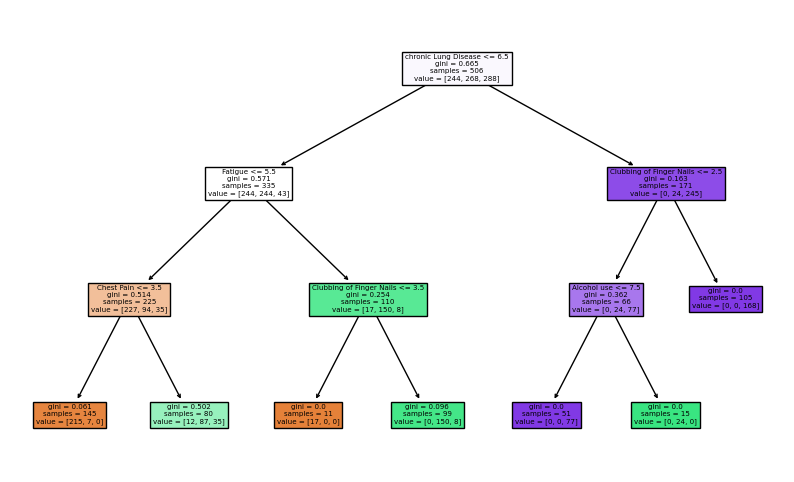

In [237]:
estimator = random_forest_clf.estimators_[0]
fig,ax = plt.subplots(figsize = (10,6))
plot_tree(estimator, feature_names=df.columns, filled=True, ax=ax)
plt.show()


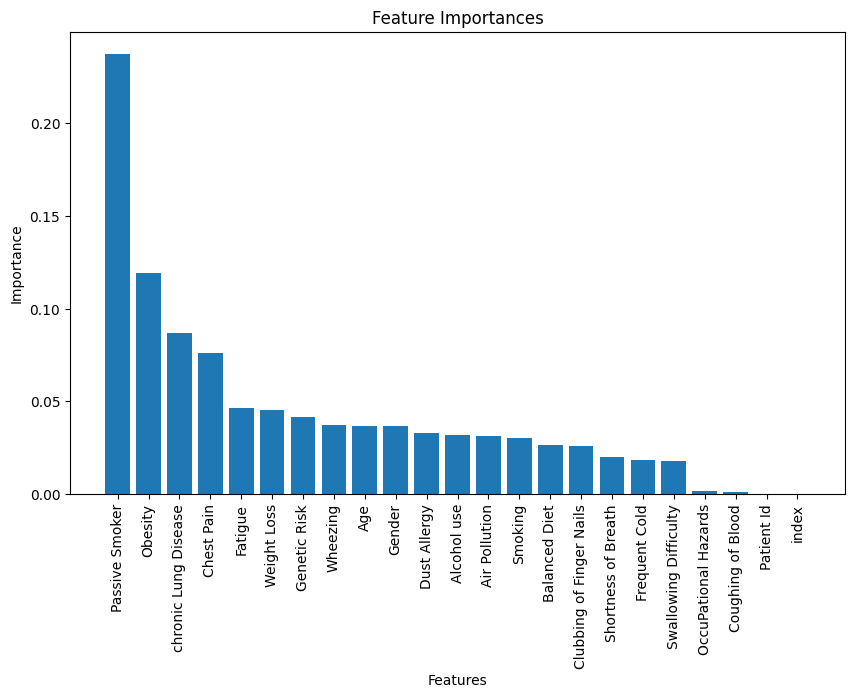

In [238]:
importances = random_forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_1.shape[1]), importances[indices], align='center')
plt.xticks(range(X_1.shape[1]), [df.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

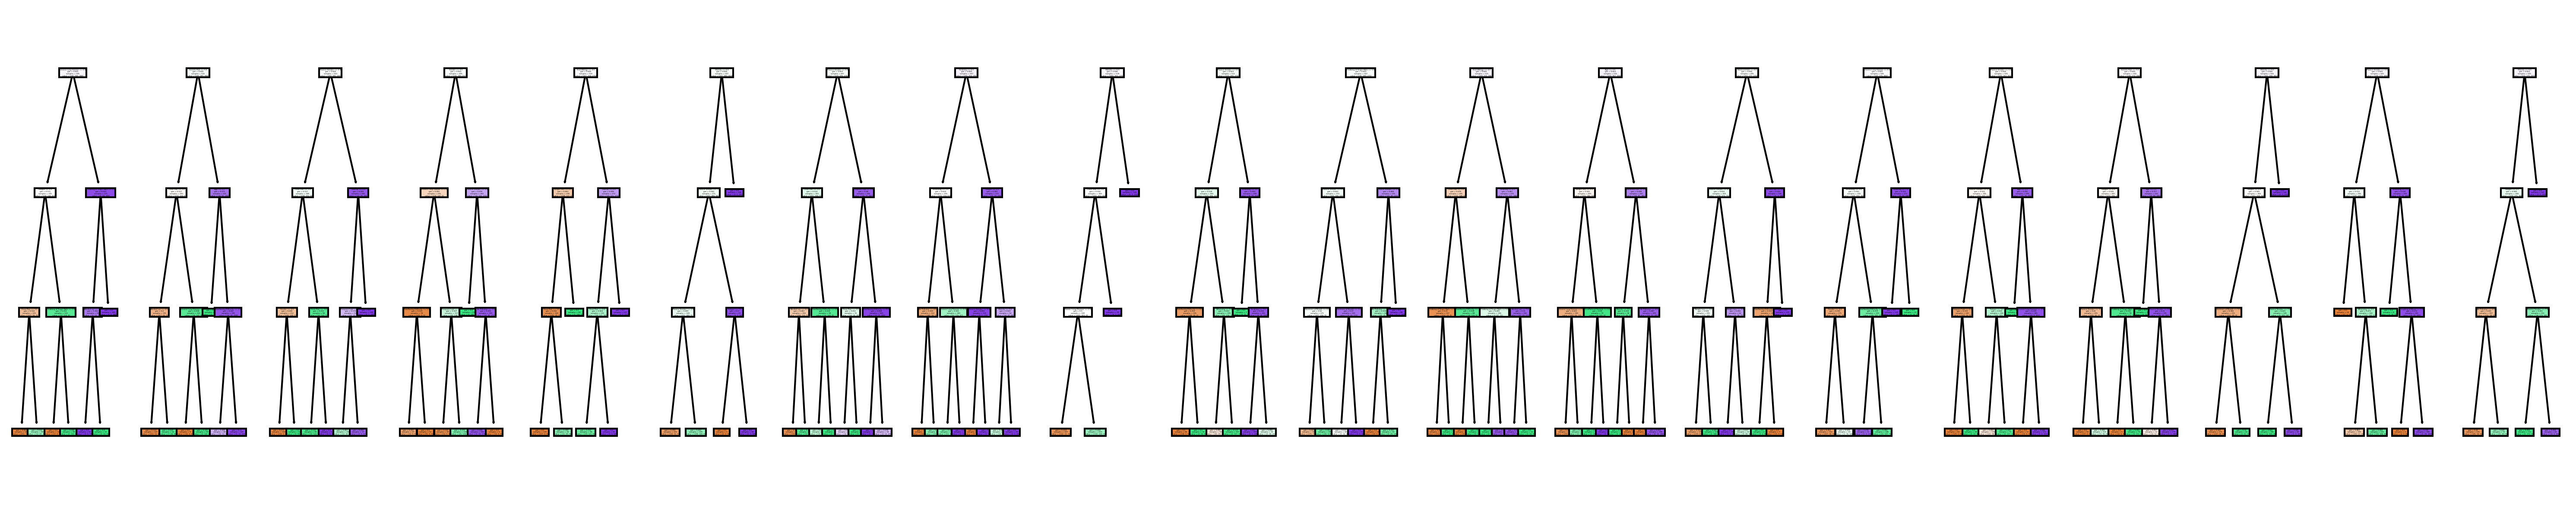

In [239]:
n_trees = len(random_forest_clf.estimators_)

# Plot each tree
fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(20, 4), dpi=300)

for idx, estimator in enumerate(random_forest_clf.estimators_):
    ax = axes[idx]
    plot_tree(estimator, feature_names=df.columns, filled=True, ax=ax)

plt.tight_layout()
plt.show()

## Kmeans clustering method

In [240]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [241]:
root = "/content/heart.csv"

In [242]:
#Reading th CSV file
data = pd.read_csv(root)

In [243]:
data_1 = data.drop(["cl","aq"],axis=1)
data_2=data_1.dropna()

In [244]:
data_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1.0,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250,0.0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204,0.0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236,0.0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354,0.0,1,163.0,1.0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1.0,0,90.0,0.0,1.0,1,2,1,0
298,57,0,0,140,241,0.0,1,123.0,1.0,0.2,1,0,3,0
300,68,1,0,144,193,1.0,1,141.0,0.0,3.4,1,2,3,0
301,57,1,0,130,131,0.0,1,115.0,1.0,1.2,1,1,3,0


In [245]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trestbps  300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    float64
 6   restecg   300 non-null    int64  
 7   thalach   300 non-null    float64
 8   exang     300 non-null    float64
 9   oldpeak   300 non-null    float64
 10  slope     300 non-null    int64  
 11  ca        300 non-null    int64  
 12  thal      300 non-null    int64  
 13  target    300 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.2 KB


In [246]:
#The last column (target) is the output
X_2 =data_2.drop(["target"],axis=1)
y_2 =data_2["target"]

In [247]:
X_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1.0,0,150.0,0.0,2.3,0,0,1
1,37,1,2,130,250,0.0,1,187.0,0.0,3.5,0,0,2
2,41,0,1,130,204,0.0,0,172.0,0.0,1.4,2,0,2
3,56,1,1,120,236,0.0,1,178.0,0.0,0.8,2,0,2
4,57,0,0,120,354,0.0,1,163.0,1.0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1.0,0,90.0,0.0,1.0,1,2,1
298,57,0,0,140,241,0.0,1,123.0,1.0,0.2,1,0,3
300,68,1,0,144,193,1.0,1,141.0,0.0,3.4,1,2,3
301,57,1,0,130,131,0.0,1,115.0,1.0,1.2,1,1,3


In [248]:
y_2


0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
300    0
301    0
302    0
Name: target, Length: 300, dtype: int64

In [249]:
X_2=data_2.iloc[:, :-1].values
y_2=data_2.iloc[:,-1].values

In [250]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

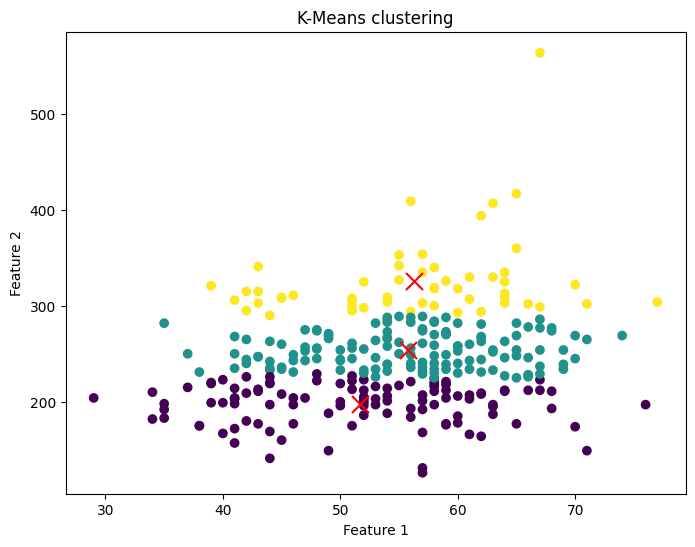

In [251]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_2[:, 0], X_2[:, 4], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], marker='x', c='r', s=150)
plt.title('K-Means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

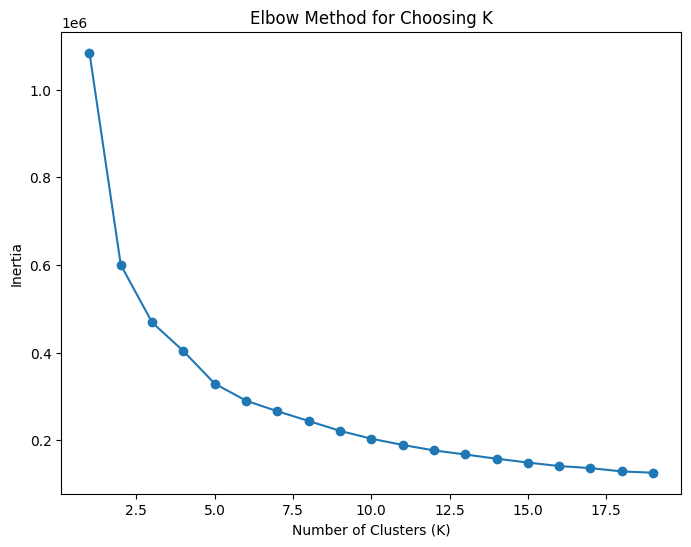

In [252]:
# Elbow method for choosing K
inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')
plt.show()

In [253]:
y_pred = kmeans.labels_

In [254]:
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.06


## Neural Network

In [255]:
from sklearn.neural_network import MLPClassifier
import networkx as nx

In [256]:
#Split test and train
X_train,X_test,y_train,y_test=train_test_split(X_2,y_2,test_size = 0.20, random_state = 42)

In [257]:
mlp = MLPClassifier(activation='logistic',max_iter=10000, random_state=42,hidden_layer_sizes=(20,10,5,3))
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10, 5, 3),
              max_iter=10000, random_state=42)

In [258]:
# Predict and calculate accuracy
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [259]:
# Function to plot the MLPClassifier structure
def plot_mlp_structure(mlp, input_size):
    layers = [input_size] + list(mlp.hidden_layer_sizes) + [1]  # Add input and output layers

    G = nx.DiGraph()
    node_count = 0
    layer_nodes = []

    # Create nodes for each layer
    for i, layer_size in enumerate(layers):
        layer_nodes.append([])
        for _ in range(layer_size):
            G.add_node(node_count, layer=i)
            layer_nodes[-1].append(node_count)
            node_count += 1

    # Create edges between nodes of subsequent layers
    for i in range(len(layer_nodes) - 1):
        for node in layer_nodes[i]:
            for next_node in layer_nodes[i + 1]:
                G.add_edge(node, next_node)

    pos = {}
    for i, layer in enumerate(layer_nodes):
        for j, node in enumerate(layer):
            pos[node] = (i, j - len(layer) / 2)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=500, node_color="skyblue", edge_color="gray")
    labels = {i: f"Input {i+1}" for i in range(input_size)}
    hidden_layers = sum([[f"H{j+1}" for j in range(size)] for size in mlp.hidden_layer_sizes], [])
    labels.update({i + input_size: hidden_layers[i] for i in range(len(hidden_layers))})
    labels.update({node_count - 1: "Output"})
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.title("MLPClassifier Structure")
    plt.show()



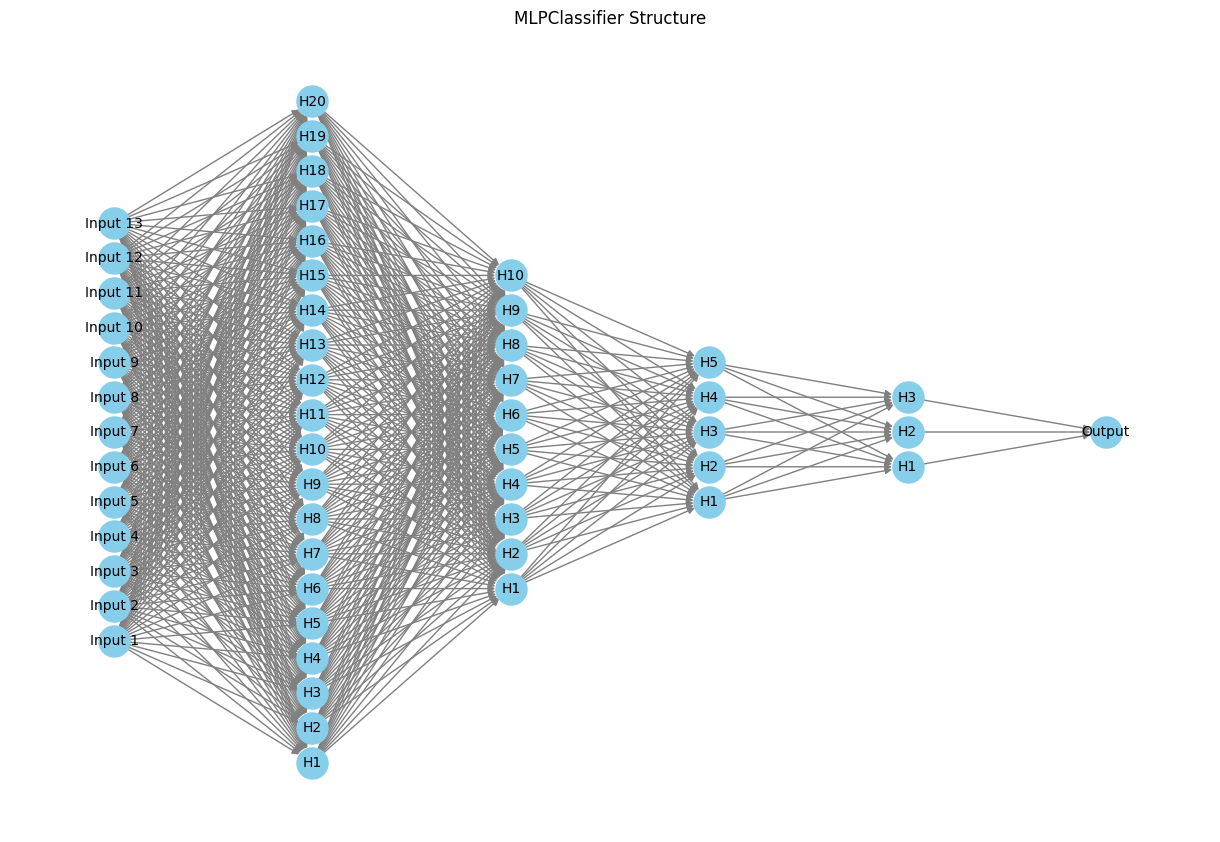

In [260]:
# Plot the MLPClassifier structure
plot_mlp_structure(mlp, X.shape[1])